In [2]:
import sqlite3
import pandas as pd
import json

# Load the data from the JSON file
json_file_path = r"C:\Users\mason\OneDrive\Desktop\heatmap_project\global_temp_anomalies_v2.json"
# Read the JSON data into a Pandas DataFrame
with open(json_file_path, 'r') as f:
    data_cleaned = pd.read_json(f)

# Connect to (or create) the SQLite database
conn = sqlite3.connect('temperature_anomalies.db')
cursor = conn.cursor()

# Create the table in SQLite
cursor.execute('''
    CREATE TABLE IF NOT EXISTS temperature_anomalies (
        Year INTEGER,
        Jan REAL,
        Feb REAL,
        Mar REAL,
        Apr REAL,
        May REAL,
        Jun REAL,
        Jul REAL,
        Aug REAL,
        Sep REAL,
        Oct REAL,
        Nov REAL,
        Dec REAL
    )
''')

# Insert the data into the table
for _, row in data_cleaned.iterrows():
    cursor.execute('''
        INSERT INTO temperature_anomalies (Year, Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
    ''', tuple(row[['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]))

# Commit the changes and close the connection
conn.commit()
conn.close()

print("Database created and data inserted successfully.")

Database created and data inserted successfully.


In [5]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('temperature_anomalies.db')

# Query to get data from 1880 onwards
query = 'SELECT * FROM temperature_anomalies WHERE Year >= 1880'
df_full_range = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the queried data
print(df_full_range)

     Year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov  \
0    1880 -0.29 -0.18 -0.11 -0.20 -0.12 -0.23 -0.21 -0.09 -0.16 -0.23 -0.20   
1    1881 -0.16 -0.17  0.04  0.04  0.02 -0.20 -0.07 -0.03 -0.14 -0.21 -0.22   
2    1882  0.14  0.15  0.03 -0.19 -0.16 -0.26 -0.21 -0.06 -0.10 -0.25 -0.16   
3    1883 -0.32 -0.39 -0.13 -0.17 -0.20 -0.13 -0.08 -0.15 -0.21 -0.14 -0.22   
4    1884 -0.16 -0.08 -0.37 -0.43 -0.37 -0.41 -0.35 -0.26 -0.27 -0.24 -0.30   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
134  2014  0.73  0.52  0.76  0.77  0.85  0.66  0.56  0.81  0.88  0.81  0.66   
135  2015  0.81  0.87  0.90  0.75  0.75  0.79  0.71  0.79  0.82  1.07  1.03   
136  2016  1.15  1.35  1.31  1.07  0.91  0.77  0.82  1.00  0.88  0.90  0.91   
137  2017  0.98  1.13  1.13  0.92  0.89  0.70  0.82  0.87  0.76  0.88  0.86   
138  2018  0.77  0.85  0.91  0.87  0.81  0.74  0.78  0.73  0.76  0.99  0.78   

      Dec  
0   -0.23  
1   -0.11  
2   -0.25  
3  

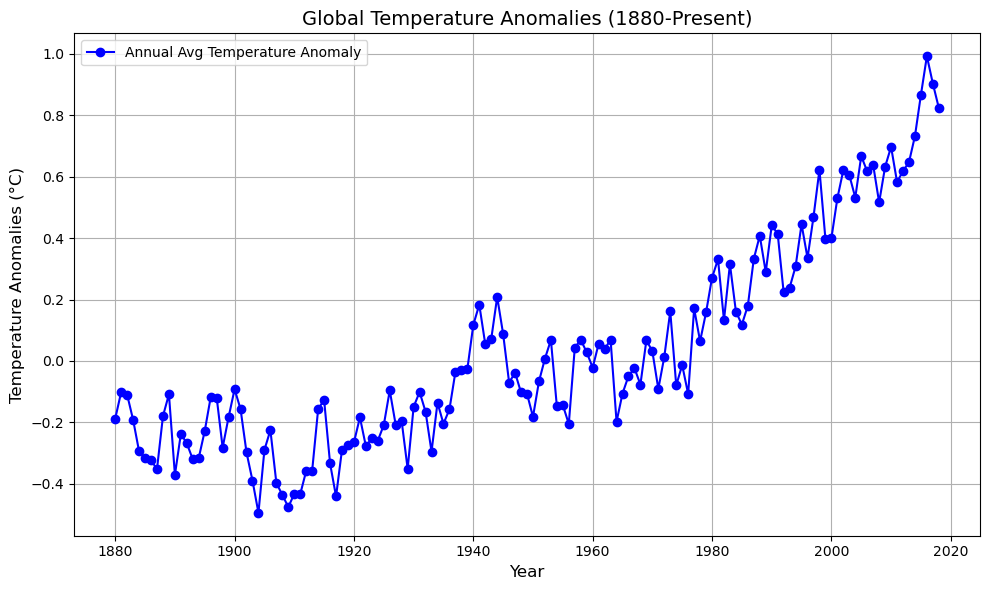

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Plotting the data using Matplotlib for 1880-present
plt.figure(figsize=(10,6))

# Plot the annual anomalies (averaged across months)
df_full_range['Annual_Avg'] = df_full_range[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean(axis=1)

plt.plot(df_full_range['Year'], df_full_range['Annual_Avg'], marker='o', linestyle='-', color='b', label='Annual Avg Temperature Anomaly')

# Adding labels and title
plt.title('Global Temperature Anomalies (1880-Present)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomalies (°C)', fontsize=12)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [8]:
import plotly.graph_objs as go
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('temperature_anomalies.db')

# Query to get data from 1880 onwards
query = 'SELECT * FROM temperature_anomalies WHERE Year >= 1880'
df_full_range = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Calculate the annual average anomaly
df_full_range['Annual_Avg'] = df_full_range[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean(axis=1)

# Create a Plotly figure with slider
fig = go.Figure()

# Adding traces for each month
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Add annual average trace (default)
fig.add_trace(go.Scatter(x=df_full_range['Year'], y=df_full_range['Annual_Avg'],
                         mode='lines+markers', name='Annual Average'))

# Add monthly traces (initially hidden)
for month in months:
    fig.add_trace(go.Scatter(x=df_full_range['Year'], y=df_full_range[month],
                             mode='lines+markers', name=month, visible=False))

# Add slider for selecting year ranges
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Year: "},
    pad={"t": 50},
    steps=[dict(label=str(year), method="update", 
                args=[{"visible": [True if year == y else False for y in df_full_range['Year']]}]) for year in df_full_range['Year']]
)]

# Update layout with dropdown and slider
fig.update_layout(
    title='Global Temperature Anomalies (1880-Present)',
    xaxis_title='Year',
    yaxis_title='Temperature Anomalies (°C)',
    sliders=sliders,
    updatemenus=[{
        'buttons': [
            {'label': 'Annual Average', 'method': 'update', 'args': [{'visible': [True] + [False] * 12}]},
            {'label': 'January', 'method': 'update', 'args': [{'visible': [False] + [True] + [False] * 11}]},
            {'label': 'February', 'method': 'update', 'args': [{'visible': [False] + [False] + [True] + [False] * 10}]},
            {'label': 'March', 'method': 'update', 'args': [{'visible': [False] + [False] * 2 + [True] + [False] * 9}]},
            # ...add other months
        ],
        'direction': 'down',
        'showactive': True,
    }]
)

# Show the interactive plot
fig.show()


In [9]:
import plotly.graph_objs as go
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('temperature_anomalies.db')

# Query to get data from 2000 onwards
query = 'SELECT * FROM temperature_anomalies WHERE Year >= 2000'
df_recent_years = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Calculate the annual average anomaly
df_recent_years['Annual_Avg'] = df_recent_years[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].mean(axis=1)

# Create a Plotly figure with slider
fig = go.Figure()

# Adding traces for each month
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Add annual average trace (default)
fig.add_trace(go.Scatter(x=df_recent_years['Year'], y=df_recent_years['Annual_Avg'],
                         mode='lines+markers', name='Annual Average'))

# Add monthly traces (initially hidden)
for month in months:
    fig.add_trace(go.Scatter(x=df_recent_years['Year'], y=df_recent_years[month],
                             mode='lines+markers', name=month, visible=False))

# Add slider for selecting year ranges
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Year: "},
    pad={"t": 50},
    steps=[dict(label=str(year), method="update", 
                args=[{"visible": [True if year == y else False for y in df_recent_years['Year']]}]) for year in df_recent_years['Year']]
)]

# Update layout with dropdown and slider
fig.update_layout(
    title='Global Temperature Anomalies (2000-Present)',
    xaxis_title='Year',
    yaxis_title='Temperature Anomalies (°C)',
    sliders=sliders,
    updatemenus=[{
        'buttons': [
            {'label': 'Annual Average', 'method': 'update', 'args': [{'visible': [True] + [False] * 12}]},
            {'label': 'January', 'method': 'update', 'args': [{'visible': [False] + [True] + [False] * 11}]},
            {'label': 'February', 'method': 'update', 'args': [{'visible': [False] + [False] + [True] + [False] * 10}]},
            {'label': 'March', 'method': 'update', 'args': [{'visible': [False] + [False] * 2 + [True] + [False] * 9}]},
            {'label': 'April', 'method': 'update', 'args': [{'visible': [False] + [False] * 3 + [True] + [False] * 8}]},
            {'label': 'May', 'method': 'update', 'args': [{'visible': [False] + [False] * 4 + [True] + [False] * 7}]},
            {'label': 'June', 'method': 'update', 'args': [{'visible': [False] + [False] * 5 + [True] + [False] * 6}]},
            {'label': 'July', 'method': 'update', 'args': [{'visible': [False] + [False] * 6 + [True] + [False] * 5}]},
            {'label': 'August', 'method': 'update', 'args': [{'visible': [False] + [False] * 7 + [True] + [False] * 4}]},
            {'label': 'September', 'method': 'update', 'args': [{'visible': [False] + [False] * 8 + [True] + [False] * 3}]},
            {'label': 'October', 'method': 'update', 'args': [{'visible': [False] + [False] * 9 + [True] + [False] * 2}]},
            {'label': 'November', 'method': 'update', 'args': [{'visible': [False] + [False] * 10 + [True] + [False] * 1}]},
            {'label': 'December', 'method': 'update', 'args': [{'visible': [False] + [False] * 11 + [True]}]},
        ],
        'direction': 'down',
        'showactive': True,
    }]
)

# Show the interactive plot
fig.show()

In [12]:
import plotly.graph_objs as go
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('temperature_anomalies.db')

# Query to get data from 1880 onwards
query = 'SELECT * FROM temperature_anomalies WHERE Year >= 1880'
df_full_range = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Prepare data for heatmap (Years as x-axis, Months as y-axis, and temperature anomalies as values)
years = df_full_range['Year']
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
values = df_full_range[months].T.values  # Transpose for heatmap format

# Initial heatmap for all years and months
heatmap = go.Heatmap(
    z=values,
    x=years,
    y=months,
    colorscale='Viridis',
    colorbar=dict(title='Temperature Anomalies (°C)'),
    hovertemplate='Year: %{x}<br>Month: %{y}<br>Temperature Anomaly: %{z}°C<extra></extra>'  # Custom hover info
)

# Layout for the heatmap
layout = go.Layout(
    title='Monthly Temperature Anomalies (1880-Present)',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Month'),
)

# Create figure and add initial heatmap
fig = go.Figure(data=[heatmap], layout=layout)

# Adding dropdown for selecting a specific month
dropdown_buttons = [
    {'label': 'All Months', 'method': 'restyle', 'args': [{'z': [values], 'y': [months]}]},
]

# Add a dropdown for each month
for i, month in enumerate(months):
    filtered_data = df_full_range[[month]].T.values  # Filter specific month
    dropdown_buttons.append(
        {'label': month, 'method': 'restyle', 'args': [{'z': [filtered_data], 'y': [[month]]}]}
    )

# Add dropdown to layout
fig.update_layout(
    updatemenus=[
        {
            'buttons': dropdown_buttons,
            'direction': 'down',
            'showactive': True,
            'x': 0.17,
            'xanchor': 'left',
            'y': 1.15,
            'yanchor': 'top'
        }
    ]
)

# Add a year range slider
fig.update_layout(
    sliders=[{
        'active': 0,
        'currentvalue': {"prefix": "Year: "},
        'pad': {"t": 50},
        'steps': [
            {
                'label': str(year),
                'method': 'restyle',
                'args': [
                    {'x': [[year]], 'z': [df_full_range.loc[df_full_range['Year'] == year][months].values.T]}
                ]
            } for year in years
        ]
    }]
)

# Show the interactive plot with dropdown and slider
fig.show()